# NEURAL NETWORK

LINEAR REGRESSION DATA SET

In [1]:
#importing the modules
import numpy as np
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt

In [ ]:
Made few good functions

In [2]:

'''returns the sigmoid of the input'''
def sigmoid (input):
    return 1/(1+np.exp(-input))




'''extracts the data and sorts into X and y variables respectively adn returns it'''

def input_data(s):
    print("uploading a  csv file that is appropriate for linear regression using neural network.......")

    X=pd.read_csv(s)   #load the training data

    # n=int(input("enter the number of features....."))

    X=X.to_numpy()    #converting to numpy
    i=len(X[0])       #finding the number of features
    m=X[:,0].size   
    y=X[:,0].reshape((m,1))
    X=np.delete(X,0,axis=1) 
    n=i                     #n is number of features
#     mean=np.mean(X,axis=1).reshape((m,1))
#     std=np.std(X,axis=1).reshape((m,1))
#     X=(X-mean)/std
    u=np.ones((m,1))            #vector of ones then p.
    mean=np.mean(X,axis=1).reshape((m,1))
    std=np.std(X,axis=1).reshape((m,1))
    X=(X-mean)/std
    X=np.concatenate((u,X),axis=1)
# <!-- #     print(X) -->
    return X,y


'''randomly initialises the value of theta the parameters'''
def parameters(L_next,L_current):
    #dimension = L_next*L_current                            
    epsilon = 0.12
    theta= - epsilon + np.random.rand(L_next, L_current) * 2 * epsilon
    return theta
    
'''the gradient of the sigmoid is returned'''   
def siggrad(z):
    g=np.zeros((z.shape))
    g=sigmoid(z)*(1-sigmoid(z))
    return g


'''the cost of the algorithm is returned '''    
def cost(theta1,theta2,X_train,Y,lamba=0):         #forward propagation
    m,n=X_train.shape
    u=np.ones((m,1))
#     X_train=np.concatenate((u,X_train),axis=1)
    a1 = X_train    #m*n
    z2 = a1@(theta1.T)  #  m,n  @  n,hiddensize
    a2 = sigmoid(z2) # m x hidden_layer
    a2 = np.concatenate((u,a2),axis=1)   
    z3 = a2@(theta2.T)    
    a3 = z3
    h_x = a3
    J=J = (1/2*m)*np.sum((h_x-Y)**2)
    return J,h_x
    
    
'''here the back propagation is applied in order to get the gradients '''
def back_prop(theta1,theta2,X,Y):
    
    A1 = X       # m,785
    Z2 = A1@theta1.T      # mx hidden_layer_size == m x 784
    A2 = sigmoid(Z2)      #  m x hidden_layer_size == mx 784
    m,n=X.shape
    u=np.ones((m,1))
    A2 = np.concatenate((u,A2),axis=1)
    Z3 = A2@theta2.T         #m x num_labels == m x 26
    A3 = Z3
    h_x = A3                  #m,26
    DELTA3 = A3 - Y
    m,n=(DELTA3@theta2).shape
    DELTA2 = (DELTA3@theta2)*(np.concatenate((np.ones((m,1)),siggrad(Z2)),axis=1))    #m,525    *
    DELTA2 = DELTA2[:,1:]
    theta1_grad = (1/m) * (DELTA2.T @ A1)
    theta2_grad = (1/m) * (DELTA3.T @ A2)
    return theta1_grad,theta2_grad


'''the loops are processed here to get the optimum value of theta by applying the gradient descent technique'''
def grad_descent(theta1,theta2,X,Y):
    alpha=0.1
    for i in range(200):
        
        theta1_grad,theta2_grad=back_prop(theta1,theta2,X,Y)
        theta2=theta2-theta2_grad*alpha
        theta1=theta1-theta1_grad*alpha
        J,h_x=cost(theta1,theta2,X_train,Y)
        plt.scatter(i,J)
        print(J)


    return theta1,theta2,h_x


'''on the new test data it gives us the desired output'''
def predict(theta1,theta2,X):
#     X=X/255
    m,n=X.shape
    u=np.ones((m,1))
    a1 = X    #m*n
    z2 = a1@(theta1.T)  #  m,n  @  n,hiddensize
    a2 = sigmoid(z2) # m x hidden_layer
    a2 = np.concatenate((u,a2),axis=1)   
    z3 = a2@(theta2.T)    
    a3 = z3
    h_x = a3
    return (h_x)
    




inputting the data 

In [3]:
X_train,y_train=input_data('Linear_train.csv')

uploading a  csv file that is appropriate for linear regression using neural network.......


In [4]:
theta1=parameters(20,21)
theta2=parameters(1,21)

In [5]:
print(theta1.shape)
print(theta2.shape)
# mn=np.mean(y_train)
# st=np.std(y_train)
# y_train=(y_train-mn)/st


(20, 21)
(1, 21)


 calling the above defined functions

1043066039863.2365
1042992312781.9734
1042909302531.3778
1042810714683.7548
1042692322596.0731
1042550236360.6274
1042380934030.445
1042181636784.3967
1041950818576.6293
1041688755927.543
1041397997003.4589
1041083603351.6901
1040753031844.6083
1040415592945.8789
1040081532898.4231
1039760904137.5354
1039462461094.2712
1039192813276.3822
1038955985667.935
1038753415309.7998
1038584302972.0045
1038446176407.365
1038335514905.1515
1038248318463.4579
1038180554799.191
1038128463623.236
1038088729739.9274
1038058552927.3168
1038035646604.6843
1038018193887.3839
1038004783012.0529
1037994337104.8452
1037986047313.0708
1037979313910.2933
1037973697053.7806
1037968877125.1208
1037964623677.8804
1037960771652.4674
1037957203473.1403
1037953835761.9414
1037950609592.9683
1037947483412.49
1037944427937.4852
1037941422505.2463
1037938452476.9768
1037935507400.794
1037932579718.1465
1037929663856.8162
1037926755597.5463
1037923851633.4807
1037920949264.9302
1037918046188.797
1037915140353.9901
103

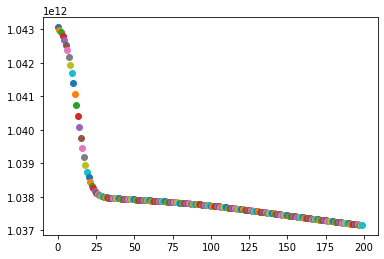

In [6]:
theta1,theta2,h_x=grad_descent(theta1,theta2,X_train,y_train)

In [7]:
rmse=(np.mean(((h_x-y_train)**2)))**0.5

rmse

28.805003257179298

In [8]:
X_test,y_test=input_data('Linear_test.csv')

uploading a  csv file that is appropriate for linear regression using neural network.......


In [9]:
y_test_pred=predict(theta1,theta2,X_test)

In [10]:
# y_test_pred=(y_test_pred*st)+mn

In [11]:
(np.mean((y_test_pred-y_test)**2))**0.5

28.84474116576372

In [12]:
y_test_pred

array([[-0.59843483],
       [ 2.55243123],
       [ 0.57724783],
       ...,
       [-1.13216552],
       [ 0.34005148],
       [-3.52295815]])

In [13]:
y_test

array([[ 40.79073983],
       [ 47.96874905],
       [  9.76256429],
       ...,
       [-34.73427806],
       [-30.75235423],
       [ 39.75797158]])